In [1]:
import pandas as pd
from datetime import datetime, timedelta
import statsmodels.api as sm
import numpy as np

# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 

# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Forecast energy supply for the next two days 

Long-term forecasts not the issue, rather short-term, intra-day supplies

What was the supply today, controlling for weather, use that as a starting point to forecast the next two days

Requires forecasting weather and other short-term effects affecting supply

Supply is fixed in the short term

### Additional information

Local weather historical and hourly forecasts

Policies



In [98]:
def datetime_range(start, end, delta):
    '''Need to create time date series'''
    current = start
    while current < end:
        yield current
        current += delta
        
dts = [dt.strftime('%Y-%m-%d %H:%M') for dt in 
       datetime_range(datetime(2020, 4, 1, 0), datetime(2021, 4, 1, 0), 
       timedelta(minutes=15))]

### Read in data

              Total
count  35040.000000
mean      39.316823
std       65.282022
min        0.000000
25%        0.000000
50%        0.362500
75%       60.577500
max      360.375000
Total    float64
dt        object
dtype: object


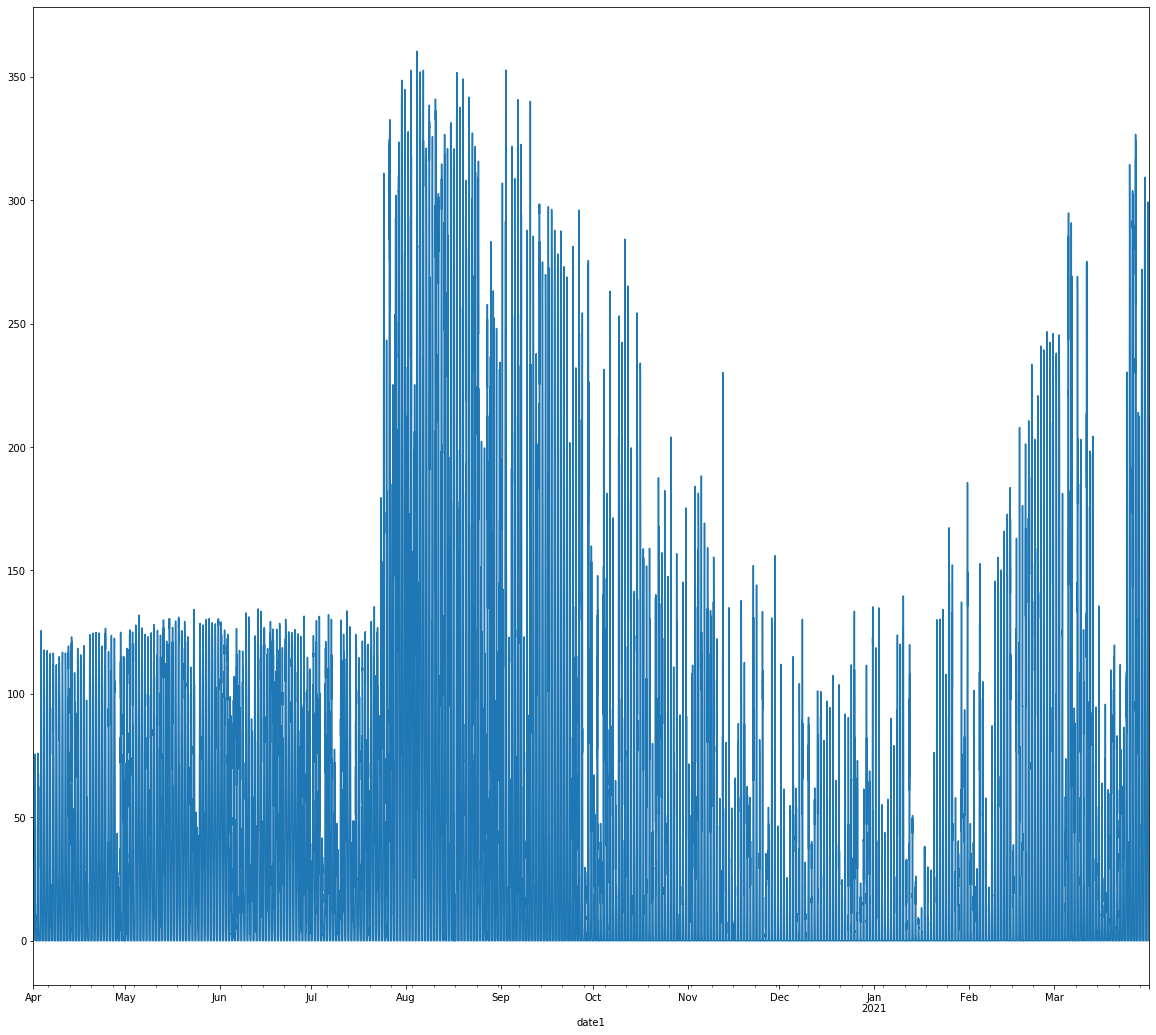

In [99]:
#read in data
dt1 = pd.read_csv('../data/production_raw.csv', dayfirst = True, parse_dates=True, index_col='DateTime')
dt1.rename(columns = {'DateTime': 'Date'}, inplace = True)
dt1['dt'] = dts
dt1['date1'] = pd.to_datetime(dt1['dt'])
dt1.set_index('date1', inplace = True)

dt1['Total'].plot(figsize = (20, 18))

print(dt1.describe())
print(dt1.dtypes)


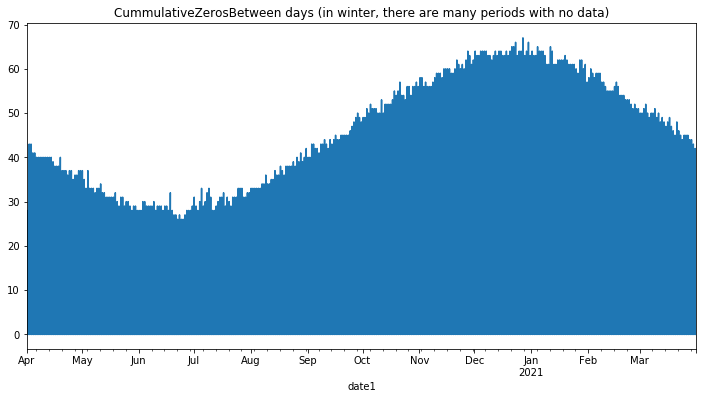

In [100]:
# cmZeros
a = dt1['Total'].shift().eq(0)
b = a.cumsum()
dt1['CmZerosBetween'] = b.sub(b.mask(a).ffill().fillna(0)).astype(int)
dt1['CmZerosBetween'].iloc[0:].plot(figsize = (12, 6), title = "CummulativeZerosBetween days (in winter, there are many periods with no data)")

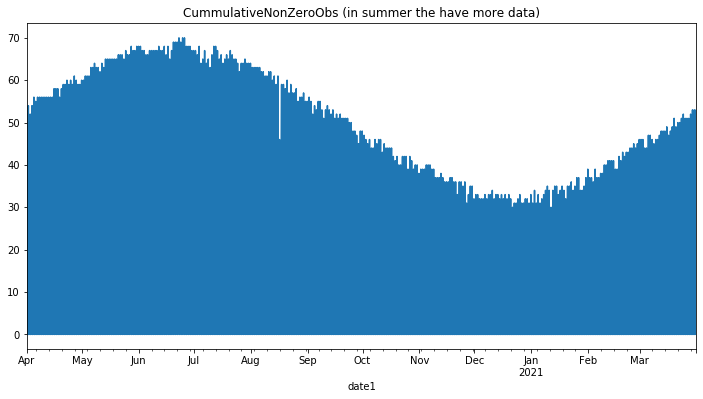

In [101]:
# cmNonZeros
a = dt1['Total'].ne(0)
b = a.cumsum()
dt1['CmNonZeros'] = b.sub(b.mask(a).ffill().fillna(0)).astype(int)
dt1['CmNonZeros'].iloc[0:].plot(figsize = (12, 6), title = 'CummulativeNonZeroObs (in summer the have more data)')

### Import radiation as a possible exogenous variable

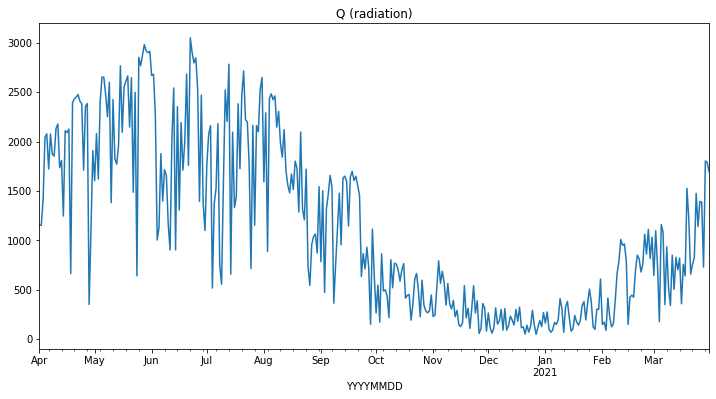

In [102]:
rad1 = pd.read_csv('../data/Radiation.csv', sep = ';')
rad1['YYYYMMDD'] = pd.to_datetime(rad1['YYYYMMDD'],  format='%Y%m%d')
rad1.set_index('YYYYMMDD', inplace = True, drop = True)
rad1.columns = rad1.columns.str.strip()

# select range
start_date = '2020-04-01'
end_date   = '2021-03-31'
rad1['Day'] = rad1.index.floor('D')
rad1.head()
mask = (rad1['Day'] >= start_date) & (rad1['Day'] <= end_date)
rad2 = rad1[mask]
rad2.head()

rad2['Q'].plot(figsize = (12, 6), title = 'Q (radiation)')

In [307]:
import numpy as np
import random
from croston import croston
import matplotlib.pyplot as plt


a = np.zeros(50)
val = np.array(random.sample(range(100,200), 10))
idxs = random.sample(range(50), 10)

ts = np.insert(a, idxs, val)

In [317]:
ts

array([136.,   0.,   0.,   0.,   0.,   0.,   0., 175.,   0.,   0.,   0.,
       186.,   0.,   0.,   0.,   0.,   0., 122.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 137.,   0.,   0.,   0.,
       112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 109.,   0., 155.,   0.,   0., 116.,   0.,
         0.,   0., 102.,   0.,   0.])

In [328]:
ts = np.array(dt1['Total'])
len(ts)

35040

In [329]:
ts

array([0., 0., 0., ..., 0., 0., 0.])

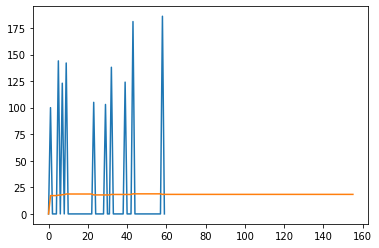

In [326]:
fit_pred = croston.fit_croston(ts, 96,'original')

yhat = np.concatenate([fit_pred['croston_fittedvalues'], fit_pred['croston_forecast']])

plt.plot(ts)
plt.plot(yhat)

In [334]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

co2 = [
    315.58,
    316.39,
    316.79,
    317.82,
    318.39,
    318.22,
    316.68,
    315.01,
    314.02,
    313.55,
    315.02,
    315.75,
    316.52,
    317.10,
    317.79,
    319.22,
    320.08,
    319.70,
    318.27,
    315.99,
    314.24,
    314.05,
    315.05,
    316.23,
    316.92,
    317.76,
    318.54,
    319.49,
    320.64,
    319.85,
    318.70,
    316.96,
    315.17,
    315.47,
    316.19,
    317.17,
    318.12,
    318.72,
    319.79,
    320.68,
    321.28,
    320.89,
    319.79,
    317.56,
    316.46,
    315.59,
    316.85,
    317.87,
    318.87,
    319.25,
    320.13,
    321.49,
    322.34,
    321.62,
    319.85,
    317.87,
    316.36,
    316.24,
    317.13,
    318.46,
    319.57,
    320.23,
    320.89,
    321.54,
    322.20,
    321.90,
    320.42,
    318.60,
    316.73,
    317.15,
    317.94,
    318.91,
    319.73,
    320.78,
    321.23,
    322.49,
    322.59,
    322.35,
    321.61,
    319.24,
    318.23,
    317.76,
    319.36,
    319.50,
    320.35,
    321.40,
    322.22,
    323.45,
    323.80,
    323.50,
    322.16,
    320.09,
    318.26,
    317.66,
    319.47,
    320.70,
    322.06,
    322.23,
    322.78,
    324.10,
    324.63,
    323.79,
    322.34,
    320.73,
    319.00,
    318.99,
    320.41,
    321.68,
    322.30,
    322.89,
    323.59,
    324.65,
    325.30,
    325.15,
    323.88,
    321.80,
    319.99,
    319.86,
    320.88,
    322.36,
    323.59,
    324.23,
    325.34,
    326.33,
    327.03,
    326.24,
    325.39,
    323.16,
    321.87,
    321.31,
    322.34,
    323.74,
    324.61,
    325.58,
    326.55,
    327.81,
    327.82,
    327.53,
    326.29,
    324.66,
    323.12,
    323.09,
    324.01,
    325.10,
    326.12,
    326.62,
    327.16,
    327.94,
    329.15,
    328.79,
    327.53,
    325.65,
    323.60,
    323.78,
    325.13,
    326.26,
    326.93,
    327.84,
    327.96,
    329.93,
    330.25,
    329.24,
    328.13,
    326.42,
    324.97,
    325.29,
    326.56,
    327.73,
    328.73,
    329.70,
    330.46,
    331.70,
    332.66,
    332.22,
    331.02,
    329.39,
    327.58,
    327.27,
    328.30,
    328.81,
    329.44,
    330.89,
    331.62,
    332.85,
    333.29,
    332.44,
    331.35,
    329.58,
    327.58,
    327.55,
    328.56,
    329.73,
    330.45,
    330.98,
    331.63,
    332.88,
    333.63,
    333.53,
    331.90,
    330.08,
    328.59,
    328.31,
    329.44,
    330.64,
    331.62,
    332.45,
    333.36,
    334.46,
    334.84,
    334.29,
    333.04,
    330.88,
    329.23,
    328.83,
    330.18,
    331.50,
    332.80,
    333.22,
    334.54,
    335.82,
    336.45,
    335.97,
    334.65,
    332.40,
    331.28,
    330.73,
    332.05,
    333.54,
    334.65,
    335.06,
    336.32,
    337.39,
    337.66,
    337.56,
    336.24,
    334.39,
    332.43,
    332.22,
    333.61,
    334.78,
    335.88,
    336.43,
    337.61,
    338.53,
    339.06,
    338.92,
    337.39,
    335.72,
    333.64,
    333.65,
    335.07,
    336.53,
    337.82,
    338.19,
    339.89,
    340.56,
    341.22,
    340.92,
    339.26,
    337.27,
    335.66,
    335.54,
    336.71,
    337.79,
    338.79,
    340.06,
    340.93,
    342.02,
    342.65,
    341.80,
    340.01,
    337.94,
    336.17,
    336.28,
    337.76,
    339.05,
    340.18,
    341.04,
    342.16,
    343.01,
    343.64,
    342.91,
    341.72,
    339.52,
    337.75,
    337.68,
    339.14,
    340.37,
    341.32,
    342.45,
    343.05,
    344.91,
    345.77,
    345.30,
    343.98,
    342.41,
    339.89,
    340.03,
    341.19,
    342.87,
    343.74,
    344.55,
    345.28,
    347.00,
    347.37,
    346.74,
    345.36,
    343.19,
    340.97,
    341.20,
    342.76,
    343.96,
    344.82,
    345.82,
    347.24,
    348.09,
    348.66,
    347.90,
    346.27,
    344.21,
    342.88,
    342.58,
    343.99,
    345.31,
    345.98,
    346.72,
    347.63,
    349.24,
    349.83,
    349.10,
    347.52,
    345.43,
    344.48,
    343.89,
    345.29,
    346.54,
    347.66,
    348.07,
    349.12,
    350.55,
    351.34,
    350.80,
    349.10,
    347.54,
    346.20,
    346.20,
    347.44,
    348.67,
]
co2 = pd.Series(
    co2, index=pd.date_range("1-1-1959", periods=len(co2), freq="M"), name="CO2"
)
co2.describe()

from statsmodels.tsa.seasonal import STL

stl = STL(co2, seasonal=13)
res = stl.fit()
fig = res.plot()

In [344]:
co2

1959-01-31    315.58
1959-02-28    316.39
1959-03-31    316.79
1959-04-30    317.82
1959-05-31    318.39
               ...  
1987-08-31    347.54
1987-09-30    346.20
1987-10-31    346.20
1987-11-30    347.44
1987-12-31    348.67
Freq: M, Name: CO2, Length: 348, dtype: float64

In [352]:
series = dt1['Total']

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
series.interpolate(inplace = True)
series.index=series.index.to_timestamp()
decomposition = series(log_passengers)

In [351]:
series.index=series.index.to_timestamp()
series

AttributeError: 'DatetimeIndex' object has no attribute 'to_timestamp'

In [361]:
import statsmodels.api as sm

my_pandas_series = series[-960:]
result = sm.tsa.seasonal_decompose(my_pandas_series.values, freq=96)
# print(result.trend)
# print(result.seasonal)
# print(result.resid)
# print(result.observed)

/home/jeff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


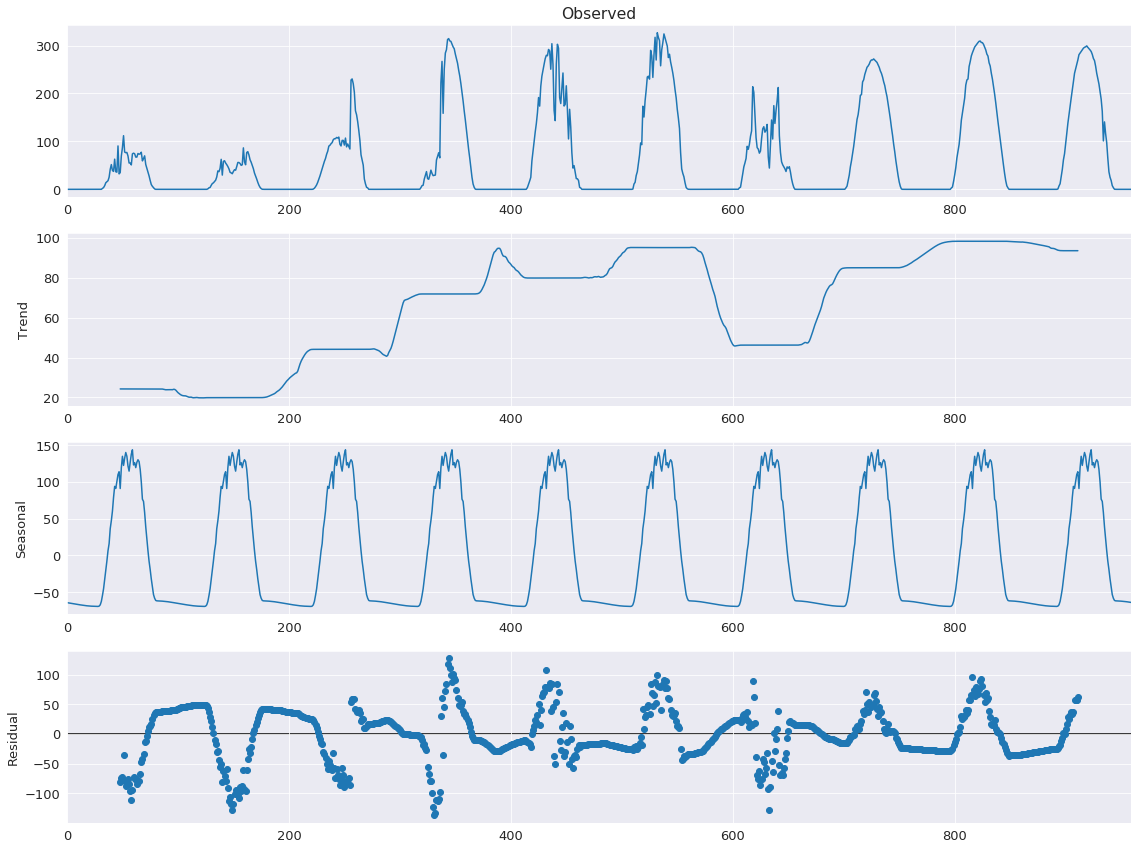

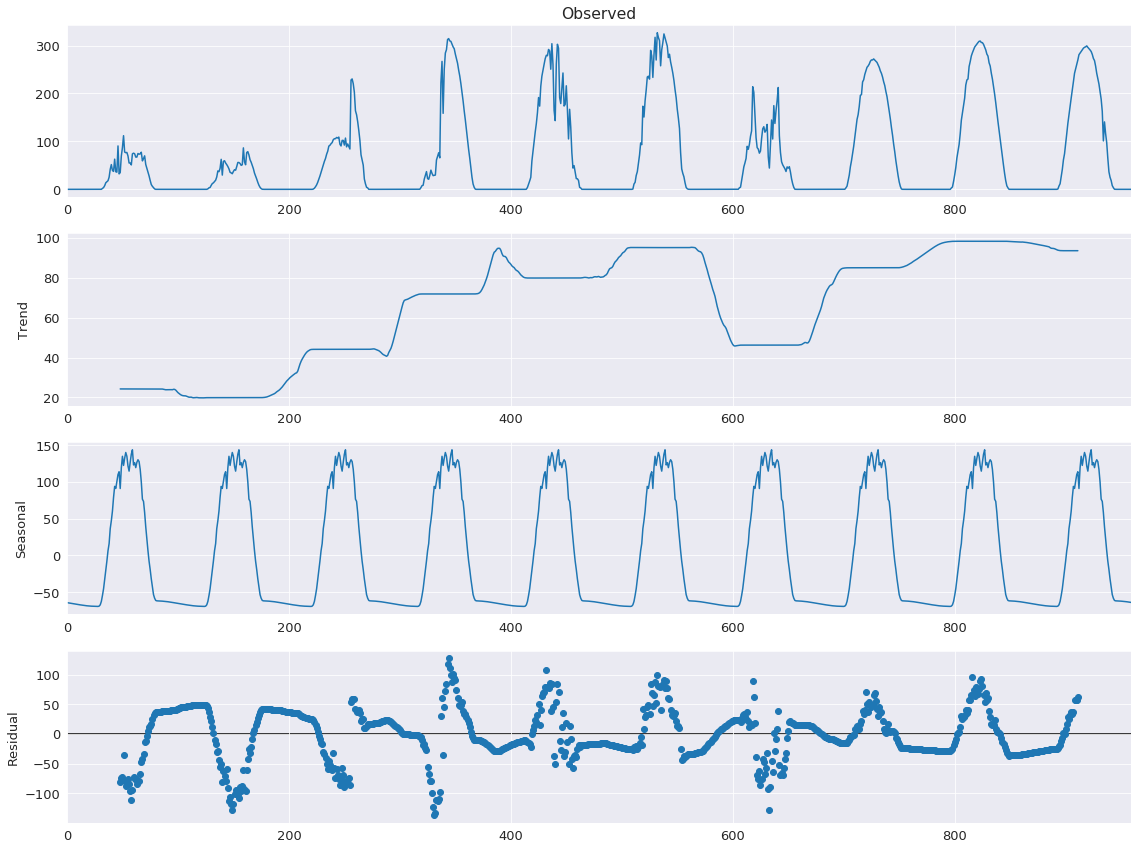

In [362]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result.plot()

In [356]:
decomposed

In [350]:
series = trc['Total']
from statsmodels.tsa.seasonal import STL

stl = STL(series, seasonal=96)
res = stl.fit()
fig = res.plot()

ValueError: Unable to determine period from endog

In [332]:
from statsmodels.tsa.seasonal import STL

series.describe()

stl = STL(series, seasonal=13)
res = stl.fit()
fig = res.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [330]:
series

array([0., 0., 0., ..., 0., 0., 0.])

### Simple ARIMA

,Total
date1,
2021-03-22 00:00:00,0.0
2021-03-22 00:15:00,0.0
2021-03-22 00:30:00,0.0
2021-03-22 00:45:00,0.0
2021-03-22 01:00:00,0.0
...,...
2021-03-31 22:45:00,0.0
2021-03-31 23:00:00,0.0
2021-03-31 23:15:00,0.0


                     Total
DateTime                  
2021-03-21 23:00:00    0.0
2021-03-21 23:15:00    0.0
2021-03-21 23:30:00    0.0
2021-03-21 23:45:00    0.0
2021-03-22 00:00:00    0.0
...                    ...
2021-03-31 22:45:00    0.0
2021-03-31 23:00:00    0.0
2021-03-31 23:15:00    0.0
2021-03-31 23:30:00    0.0
2021-03-31 23:45:00    0.0

[960 rows x 1 columns]


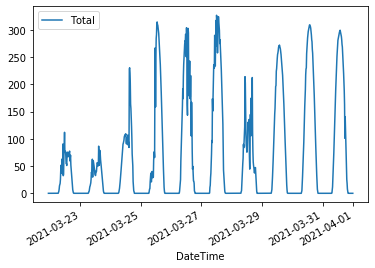

In [293]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

lastNumObs = 960

trcSubset = dt1[['Total']].tail(lastNumObs)

series = trc[-lastNumObs:]
print(series)
series.plot()


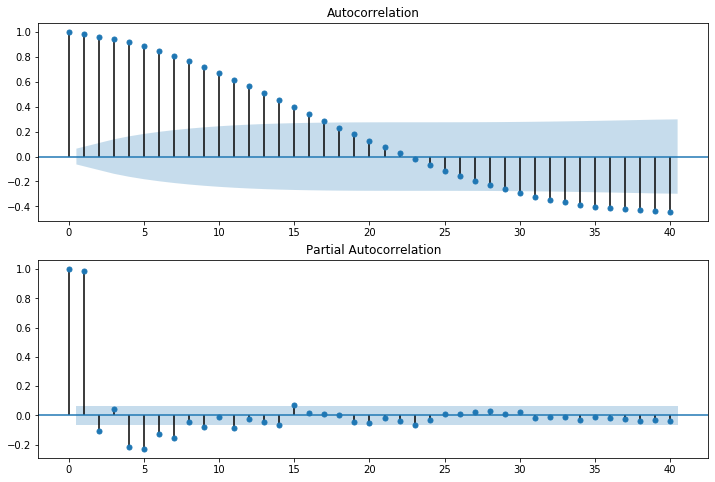

In [294]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series, lags=40, ax=ax2)
plt.show()

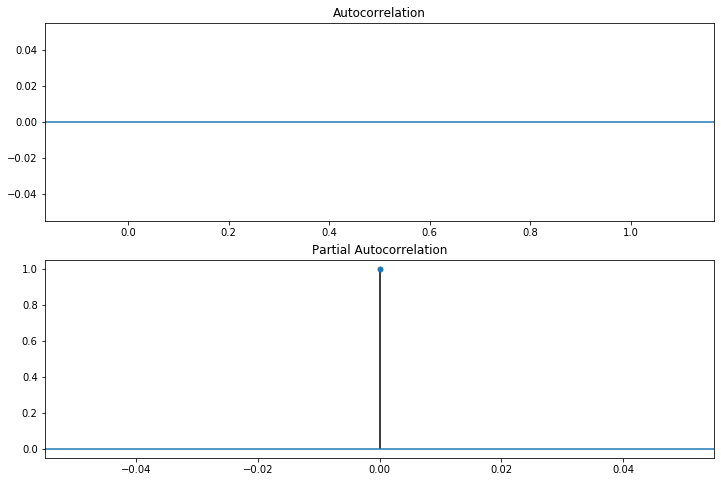

In [302]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trcSubset['Total'].diff(), lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trcSubset['Total'].diff(), lags=100, ax=ax2)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  960
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4106.875
Date:                Sun, 16 Jan 2022   AIC                           8217.750
Time:                        07:52:19   BIC                           8227.482
Sample:                             0   HQIC                          8221.456
                                - 960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0944      0.016      5.836      0.000       0.063       0.126
sigma2       307.3724      4.352     70.629      0.000     298.843     315.902
Ljung-Box (Q):                      199.29   Jarque-

/home/jeff/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/jeff/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/jeff/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


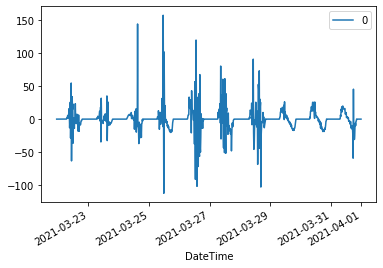

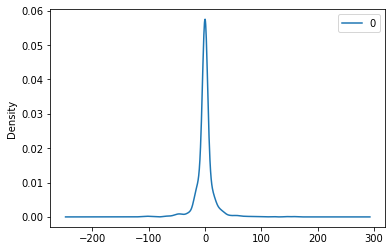

                   0
count   9.600000e+02
mean    3.834462e-18
std     1.752296e+01
min    -1.125690e+02
25%    -1.463745e+00
50%    5.928788e-322
75%     5.448236e-01
max     1.576206e+02


In [267]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

# fit model
model = ARIMA(series, order=(1,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=-0.000000, expected=0.000000
predicted=63.874682, expected=222.322500
predicted=11.462961, expected=4.177500
predicted=0.000000, expected=0.000000
predicted=172.892944, expected=214.990000
predicted=53.212276, expected=49.390000
predicted=-0.000000, expected=0.000000
predicted=70.271498, expected=96.757500
predicted=242.832035, expected=227.042500
predicted=-0.000000, expected=0.000000
predicted=3.209979, expected=4.510000
predicted=93.778956, expected=174.575000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=270.288299, expected=272.000000
predicted=-0.279580, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=287.871391, expected=291.010000
predicted=14.620524, expected=7.367500
predicted=-0.000000, expected=0.000000
predicted=210.786559, expected=224.507500
predicted=102.563967, expected=97.372500
Test RMSE: 19.227


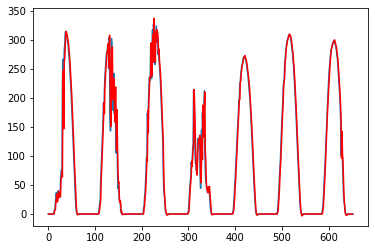

In [264]:
from sklearn.metrics import mean_squared_error
from math import sqrt

series.index = series.index.to_period('15T')
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    if t%30 == 0:
        print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### Try ARIMA(X)

In [43]:
import pmdarima
from pmdarima.arima import ADFTest
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [9]:
dt1.head()

,Total,CmZerosBetween,CmNonZeros
DateTime,,,
2020-04-01 00:00:00,0.0,0,0
2020-04-01 00:15:00,0.0,1,0
2020-04-01 00:30:00,0.0,2,0
2020-04-01 00:45:00,0.0,3,0
2020-04-01 01:00:00,0.0,4,0


In [11]:
trc = dt1[dt1.index >= '2020-08-01']
trc = dt1[['Total']]
trc[0:10]

,Total
DateTime,
2020-04-01 00:00:00,0.0
2020-04-01 00:15:00,0.0
2020-04-01 00:30:00,0.0
2020-04-01 00:45:00,0.0
2020-04-01 01:00:00,0.0
2020-04-01 01:15:00,0.0
2020-04-01 01:30:00,0.0
2020-04-01 01:45:00,0.0
2020-04-01 02:00:00,0.0


In [12]:
lastNumObs = 960
subset1 = trc[-lastNumObs:]
exog1 = np.where(subset1['Total'] != 0, 0, 1)

print(len(subset1))

test_size = 96
train = subset1[:-test_size]
y = train.values
exogTrain = subset1[:-test_size]
print(len(y))
train_size = len(train)
print(train_size)
test = subset1[-test_size:]
exogTest = subset1[-test_size:]
print(len(test))

import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data
y = subset1 #pm.datasets.load_wineind()
train, test = train_test_split(y, train_size = train_size)

# Fit your model
model = pm.auto_arima(train, exogenous = exogTrain, stepwise=False, trace=True)

# make your forecasts
forecasts = model.predict(test.shape[0], exogenous = exogTest)  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
plt.figure(figsize=(12, 6), dpi=80)
x = np.arange(y.shape[0])
plt.plot(x[:train_size], train, c='blue')
plt.plot(x[train_size:], forecasts, c='green')
plt.show()

### Holts-Winter

(1920, 1)


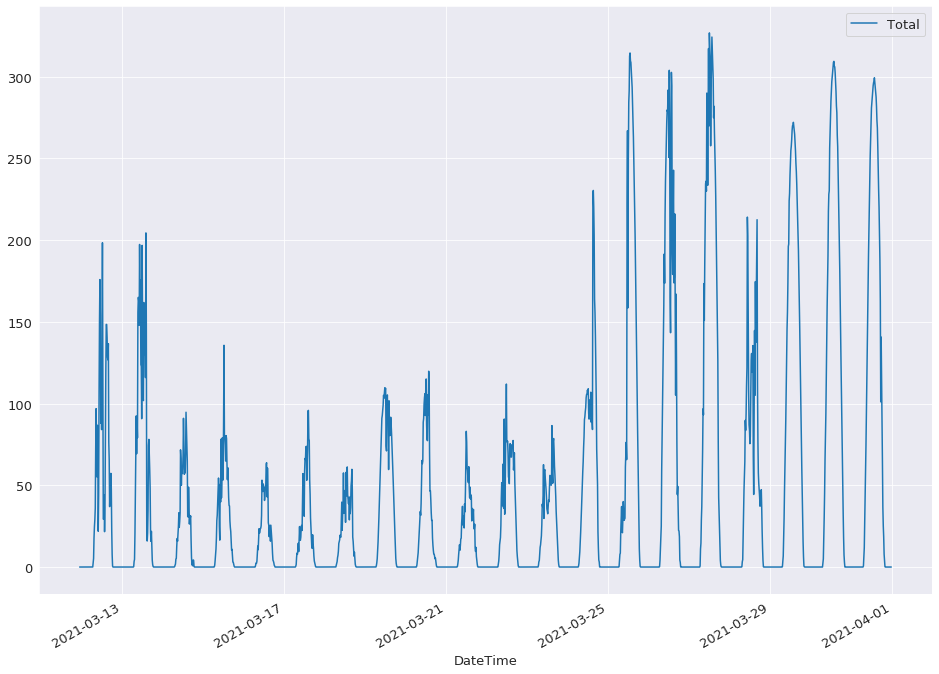

In [373]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing
lastNumObs = 96 * 20
data = trc[-lastNumObs:]
print(data.shape)
data.plot()

In [374]:
data.head()

,Total
DateTime,
2021-03-11 23:00:00,0.0
2021-03-11 23:15:00,0.0
2021-03-11 23:30:00,0.0
2021-03-11 23:45:00,0.0
2021-03-12 00:00:00,0.0


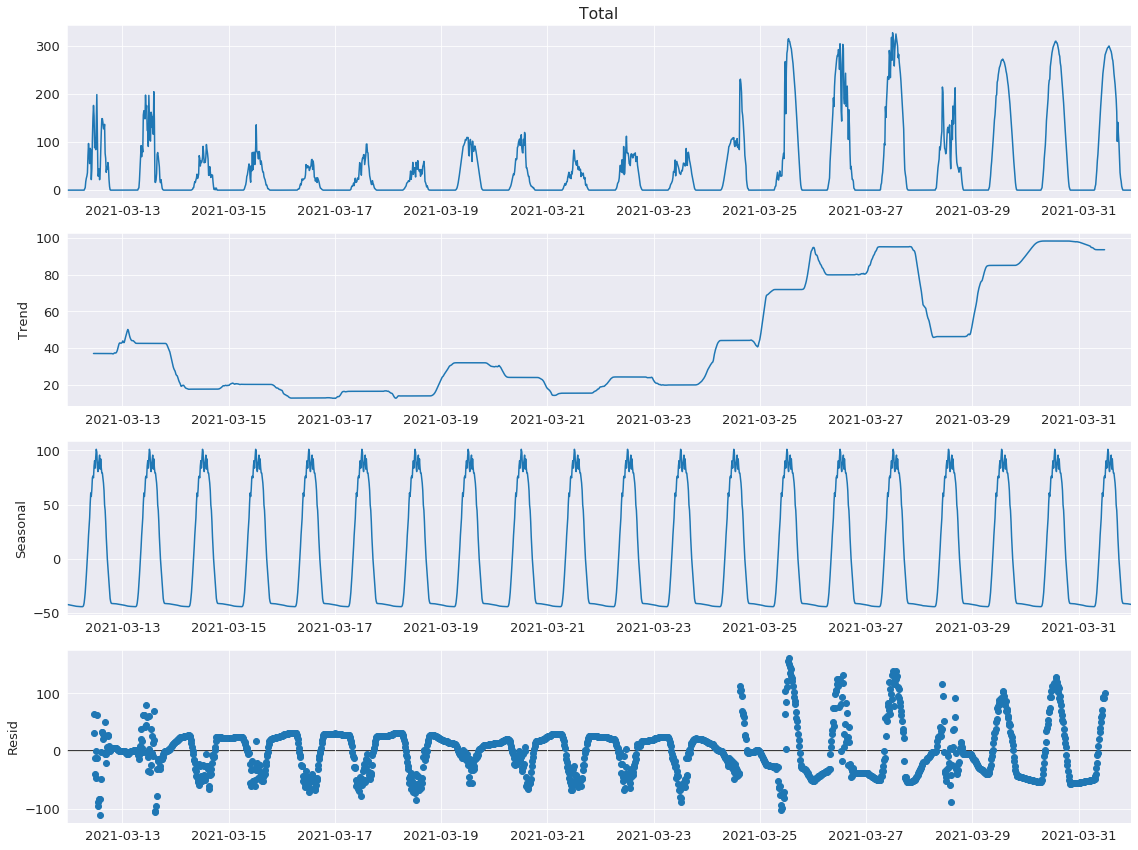

In [375]:
from matplotlib.pyplot import figure


data.asfreq('15MIN')
decompose_result = seasonal_decompose(data['Total'],model='additive', period = 96)
decompose_result.plot()

m = 96
alpha = 1/(2*m)

In [376]:
#https://stats.stackexchange.com/questions/127337/explain-the-croston-method-of-r
#https://analyticsindiamag.com/hands-on-guide-to-time-series-analysis-using-simple-exponential-smoothing-in-python/#:~:text=Simple%20Exponential%20Smoothing%20(SES)%20is,statsmodel%20using%20pip%20install%20statsmodel.&text=Simple%20Exponential%20Smoothing%20is%20defined,where%20we%20will%20import%20it.
#https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html
#https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html

In [384]:
aust = dt1['Total']
aust = aust.iloc[-960:]
aust.head()

date1
2021-03-22 00:00:00    0.0
2021-03-22 00:15:00    0.0
2021-03-22 00:30:00    0.0
2021-03-22 00:45:00    0.0
2021-03-22 01:00:00    0.0
Name: Total, dtype: float64

In [389]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline

fit1 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    initialization_method="estimated",
).fit()
fit3 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    damped_trend=True,
    initialization_method="estimated",
).fit()
fit4 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    initialization_method="estimated",
).fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")

fit1.forecast(8).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()
print(
    "Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality."
)

results

TypeError: __init__() got an unexpected keyword argument 'initialization_method'

/home/jeff/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/jeff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


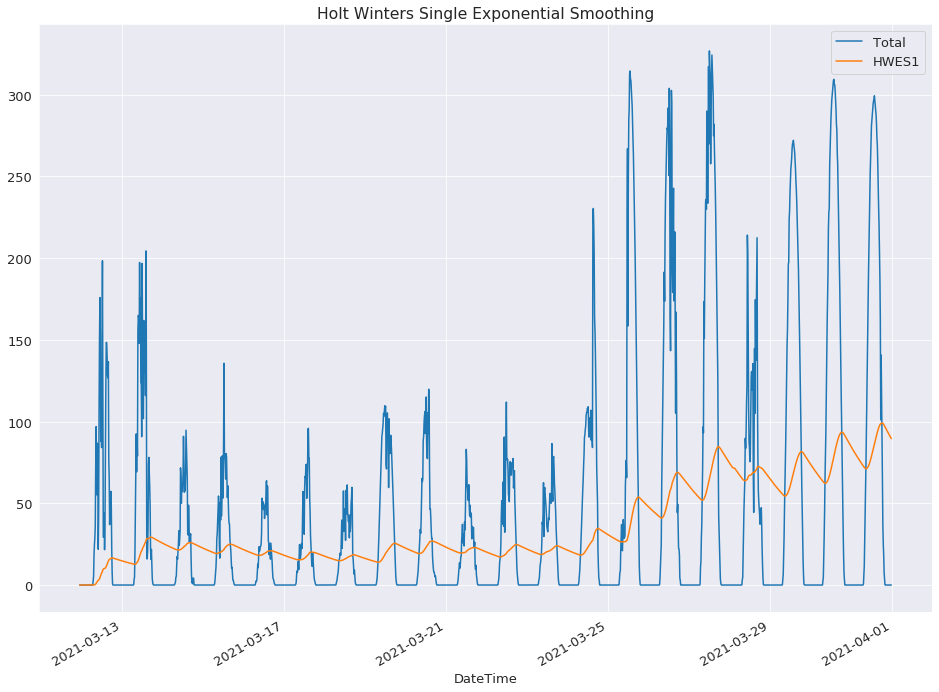

In [376]:
data['HWES1'] = SimpleExpSmoothing(data['Total']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
data[['Total','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

/home/jeff/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/jeff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


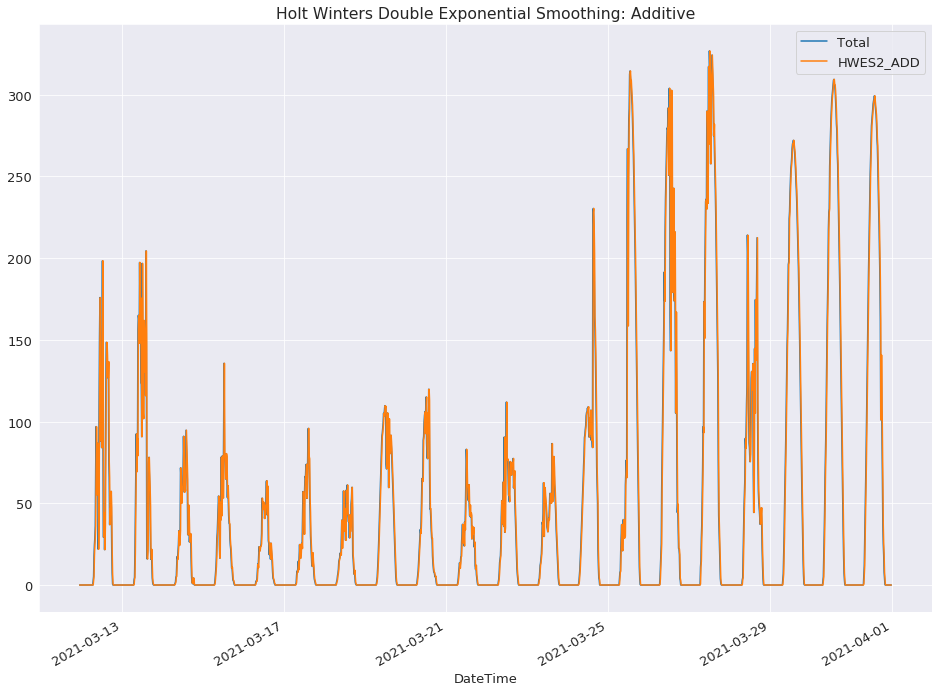

In [377]:
data['HWES2_ADD'] = ExponentialSmoothing(data['Total'],trend='add',seasonal_periods=96).fit().fittedvalues
data[['Total','HWES2_ADD']].plot(title='Holt Winters Double Exponential Smoothing: Additive');

In [213]:
data.asfreq('15T')

,Total,HWES1,HWES2_ADD
DateTime,,,
2021-03-21 23:00:00,0.0,0.000000,0.054097
2021-03-21 23:15:00,0.0,0.000000,0.041136
2021-03-21 23:30:00,0.0,0.000000,0.035445
2021-03-21 23:45:00,0.0,0.000000,0.030856
2021-03-22 00:00:00,0.0,0.000000,0.026882
...,...,...,...
2021-03-31 22:45:00,0.0,91.284079,-3.213558
2021-03-31 23:00:00,0.0,90.808641,-2.799886
2021-03-31 23:15:00,0.0,90.335680,-2.439465


In [378]:
train_data = data[:(lastNumObs-96)]
test_data = data[(lastNumObs-96):]

In [380]:
fitted_model = ExponentialSmoothing(train_data['Total'], trend = 'add', seasonal='add',seasonal_periods=96).fit()
test_predictions = fitted_model.forecast(96)
test_predictions.index = testindex

/home/jeff/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/jeff/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

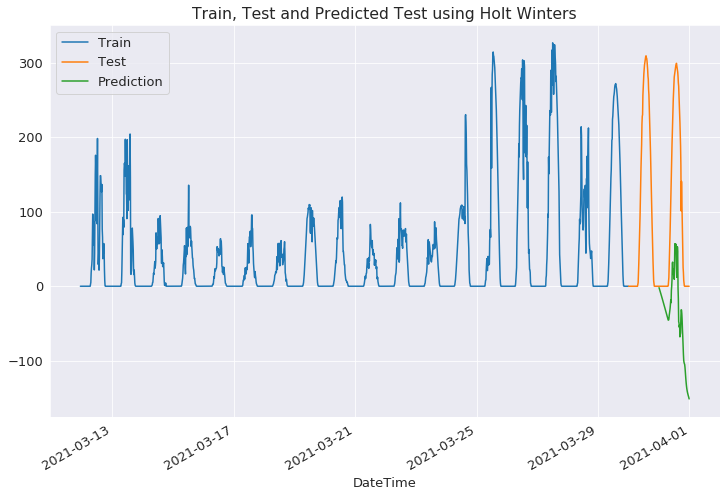

In [381]:
train_data['Total'].plot(legend=True,label='Train')
test_data['Total'].plot(legend=True,label='Test',figsize=(12,8))
test_predictions.plot(legend=True,label='Prediction')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [ ]:
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

ins2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')

#Third Instance
ins3 = SimpleExpSmoothing(data).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = data.plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')


In [ ]:
model = ExponentialSmoothing(train)
results = model.fit()
predicted = results.forecast(120)
predicted.plot()

In [ ]:
sub1 = trc[-20:]
print(sub1)
test_size = 5
train = sub1[:-test_size]
print(train)
test = sub1[-test_size:]
test

In [ ]:
split = 5
train_size = len(trc[-5000:1])

In [ ]:
4*24*2

#### 

In [ ]:
y_train = trc[0:].values

In [ ]:
arima_model = pmdarima.auto_arima(y_train, start_p=2, d=0, start_q=0, max_p=3, max_d=2, max_q=3, seasonal=False)
order = arima_model.order
order

In [ ]:
predDataFrame['ARIMA'] = pd.DataFrame(arima_model.predict(n_periods = predPeriod-1), index = y_test.index).values

# predict based on model
model2 =  sm.tsa.arima.ARIMA(y_train, order=order).fit()

In [ ]:
model2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
trc.values
trc.index

In [ ]:
X = trc.index
#X = np.reshape(X, (len(X), 1))
y = trc.values
X

In [ ]:
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(y)
plt.plot(trend)
plt.legend(['data', 'trend'])
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)


dt1['Q'] = np.repeat(rad2.values[:,0], 24 * 4, axis=0)
# Fit and summarize OLS model
dt1.head()
dt1['Q_2'] = dt1['Q'] * dt1['Q']
dt1['Q_3'] = dt1['Q_2'] * dt1['Q']

In [ ]:
exog1 = dt1[['Q', 'Q_2', 'Q_3']].values
exog1 = np.array(exog1, dtype=float)
exog1

In [ ]:
exog1 = sm.add_constant(exog1, prepend=True)

endog1 = dt1['Total'].values

mod = sm.OLS(endog1, exog1)
res = mod.fit()
print(res.summary())

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit

series = dt1['Total'].values
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

In [ ]:
dt2 = dt1[dt1.index >= '2020-08-01']
dtMonth = dt2.groupby(pd.Grouper(freq='D')).sum()
dtMonth['Total'].plot(figsize = (20, 18))

### What are interday patterns, do they change through time?

In [ ]:
dt3 = dt1.drop(columns = ['Date', 'dt', 'CmZerosBetween', 'CmNonZeros'])
dt3.head()
dt3['2020-08-04'].plot(figsize = (20, 13))

In [ ]:
dt3['Day'] = dt3.index.floor('D')

start_date = '2021-01-15'
end_date   = '2021-01-25'

mask = (dt3['Day'] >= start_date) & (dt3['Day'] <= end_date)
dt4 = dt3[mask]

grp1 = dt4.groupby('Day')

for key, dat in grp1:
    dat['Total'].plot(figsize = (20, 8))
    

In [ ]:
start_date = '2020-08-15'
end_date   = '2020-08-25'

mask = (dt3['Day'] >= start_date) & (dt3['Day'] <= end_date)
dt4 = dt3[mask]

grp1 = dt4.groupby('Day')

for key, dat in grp1:
    dat['Total'].plot(figsize = (20, 8))

### Split data

In [ ]:
split = int(len(dt1) * 0.5)
train = dt1.iloc[:split].copy()
dtMonth = train.groupby(pd.Grouper(freq='D')).sum()
dtMonth['Total'].plot(figsize = (20, 18))

In [ ]:
# Add a dummy for data until Aug

In [ ]:
qdata = pd.read_csv('../data/Radiation.csv', sep = ';')
qdata

In [ ]:
pd.to_datetime(qdata['YYYYMMDD'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')